In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

gpd.options.use_pygeos = True 

/var/folders/zx/x6hb1_p95p33hh3235qrnlqm0000gn/T/ipykernel_28737/3224799141.py:5: UserWarning: pygeos support was removed in 1.0. geopandas.use_pygeos is a no-op and will be removed in geopandas 1.1.
  gpd.options.use_pygeos = True


In [2]:
# 1. Load CONUS grid geometry
grids = gpd.read_file("/Users/koacow/repos/glob-s-RA/patents/grid_panel/data/grid.geojson")
grids

,grid_id,geometry
0,195,"POLYGON ((-81 25.25, -81 25.12432, -81.0096 25..."
1,196,"POLYGON ((-81 25.25, -80.75 25.25, -80.75 25.1..."
2,197,"MULTIPOLYGON (((-80.55905 25, -80.54476 25.012..."
3,198,"POLYGON ((-80.5 25.25, -80.3103 25.25, -80.327..."
4,456,"POLYGON ((-81 25.5, -81 25.25, -81.16944 25.25..."
...,...,...
15433,25195,"POLYGON ((-95 49.25, -95 49, -95.15371 49, -95..."
15434,25196,"POLYGON ((-94.75 49, -95 49, -95 49.25, -94.80..."
15435,25197,"POLYGON ((-94.75 49, -94.75 49.09906, -94.7189..."
15436,25456,"POLYGON ((-95 49.25, -95.15342 49.25, -95.1533..."


In [3]:
# 1.2 Load counties geometry
counties = gpd.read_file(
    "/Users/koacow/repos/glob-s-RA/patents/grid_control_outcome/data/cb_2018_us_county_5m/cb_2018_us_county_5m.shp",
).to_crs(epsg=4326)[["GEOID", "geometry"]].rename(
    columns={"GEOID": "FIPS5"}
)
counties

,FIPS5,geometry
0,39071,"POLYGON ((-83.86976 39.05553, -83.86568 39.247..."
1,06003,"POLYGON ((-120.07248 38.50987, -120.07239 38.7..."
2,12033,"POLYGON ((-87.62999 30.87766, -87.62946 30.880..."
3,17101,"POLYGON ((-87.91028 38.57493, -87.90811 38.850..."
4,28153,"POLYGON ((-88.94317 31.78421, -88.94336 31.824..."
...,...,...
3228,42055,"POLYGON ((-78.09897 39.72247, -78.0693 39.7483..."
3229,12001,"POLYGON ((-82.65855 29.83014, -82.65149 29.825..."
3230,48247,"POLYGON ((-98.95467 27.2694, -98.79809 27.2680..."
3231,29099,"POLYGON ((-90.7628 38.29555, -90.7556 38.33005..."


In [4]:
# 1.3 Load grid disaster exposure data
grid_disasters = pd.read_parquet(
    "/Users/koacow/repos/glob-s-RA/patents/grid_panel/data/grid_disaster_panel.parquet"
)
grid_disasters

,grid_id,year,hit,count,total_deaths,total_damage_adj
0,10012,1987.0,1,1,61.0,296196.0
1,10012,1988.0,1,1,0.0,0.0
2,10012,1989.0,1,1,0.0,0.0
3,10012,1992.0,1,2,0.0,0.0
4,10012,1995.0,1,1,18.0,3841035.0
...,...,...,...,...,...,...
13550,9974,2010.0,1,1,0.0,0.0
13551,9975,1992.0,1,1,1.0,208567.0
13552,9975,1994.0,1,1,60.0,59231878.0
13553,9976,1992.0,1,1,1.0,208567.0


In [5]:
# 2.1 Load patent innovation data
innovation_measures = pd.read_csv(
    "/Users/koacow/BOSTON UNIVERSITY Dropbox/Ngoc Duy Khoa Cao/GLOB~S/Research Projects/Shocks and Innovation/Patent Data/Innovation Measures/patents_innovation_measures.csv",
    dtype={"patent_id": str, "patent_date": str},
    usecols=["patent_id", "atypicality_score", "fwd_citation_impact_score", "entropy_score", "patent_date"]
)
innovation_measures["year"] = pd.to_datetime(innovation_measures["patent_date"]).dt.year
innovation_measures = innovation_measures.drop_duplicates(subset=["patent_id"], keep="first")
innovation_measures = innovation_measures.drop(columns=["patent_date"])
innovation_measures

,patent_id,atypicality_score,fwd_citation_impact_score,entropy_score,year
0,10000000,NaN,18.195203,1.039721,2018
1,10000001,8.984207,NaN,-0.000000,2018
2,10000002,8.375340,NaN,1.627269,2018
3,10000003,6.990229,1.386294,0.881594,2018
4,10000004,6.239670,NaN,0.997282,2018
...,...,...,...,...,...
7507814,RE50254,NaN,NaN,NaN,2024
7507815,RE50255,NaN,NaN,1.329977,2024
7507816,RE50256,NaN,NaN,NaN,2024
7507817,RE50257,NaN,NaN,NaN,2024


In [6]:
innovation_measures['year'].value_counts().sort_index()

year
1995    113954
1996    121811
1997    124181
1998    163265
1999    169252
2000    176192
2001    184172
2002    184494
2003    187104
2004    181413
2005    157829
2006    196489
2007    182978
2008    185260
2009    192052
2010    244599
2011    248101
2012    277285
2013    303658
2014    327014
2015    326969
2016    334674
2017    352587
2018    341104
2019    392618
2020    390572
2021    363829
2022    360417
2023    350094
2024    373852
Name: count, dtype: int64

In [7]:
# 2.2 Load patent coordinates
patent_data = pd.read_csv(
    "/Users/koacow/BOSTON UNIVERSITY Dropbox/Ngoc Duy Khoa Cao/GLOB~S/Research Projects/Shocks and Innovation/Patent Data/US Patents Data.csv",
    dtype={"patent_id": str, "patent_date": str},
    usecols=["patent_id", "latitude", "longitude", "patent_date"]
)
patent_data["year"] = pd.to_datetime(patent_data["patent_date"]).dt.year
patent_data = patent_data.drop_duplicates(subset=["patent_id"], keep="first")
patent_data = patent_data.drop(columns=["patent_date"])
patent_data

,patent_id,latitude,longitude,year
0,10000000,33.891599,-118.395124,2018
1,10000007,43.057848,-88.126198,2018
6,10000008,40.973154,-73.961526,2018
7,10000009,37.668821,-122.080796,2018
8,10000010,43.220897,-77.283042,2018
...,...,...,...,...
9325233,RE49664,37.379663,-122.137464,2023
9325235,RE49666,35.925206,-86.868942,2023
9325236,RE49667,29.723557,-98.935864,2023
9325237,RE49673,47.603832,-122.330062,2023


In [8]:
# 2.3 Merge innovation measures with patent coordinates
patent_data = patent_data.merge(
    innovation_measures,
    on="patent_id", 
    how="right",
    validate="one_to_one",
    suffixes=(None, "_y")
)
patent_data["year"] = patent_data["year"].combine_first(patent_data["year_y"])
patent_data = patent_data.drop(columns=["year_y"])
patent_data.to_csv("/Users/koacow/BOSTON UNIVERSITY Dropbox/Ngoc Duy Khoa Cao/GLOB~S/Research Projects/Shocks and Innovation/Patent Data/Innovation Measures/patent_innovation_measures_geolocated.csv", index=False)
patent_data

,patent_id,latitude,longitude,year,atypicality_score,fwd_citation_impact_score,entropy_score
0,10000000,33.891599,-118.395124,2018.0,NaN,18.195203,1.039721
1,10000001,NaN,NaN,2018.0,8.984207,NaN,-0.000000
2,10000002,NaN,NaN,2018.0,8.375340,NaN,1.627269
3,10000003,NaN,NaN,2018.0,6.990229,1.386294,0.881594
4,10000004,NaN,NaN,2018.0,6.239670,NaN,0.997282
...,...,...,...,...,...,...,...
7507814,RE50254,NaN,NaN,2024.0,NaN,NaN,NaN
7507815,RE50255,NaN,NaN,2024.0,NaN,NaN,1.329977
7507816,RE50256,NaN,NaN,2024.0,NaN,NaN,NaN
7507817,RE50257,NaN,NaN,2024.0,NaN,NaN,NaN


In [9]:
patent_data[["longitude", "latitude"]].isnull().sum()

longitude    3890399
latitude     3890399
dtype: int64

In [10]:
# 2.4 Convert patent coordinates to GeoDataFrame
geo_patent_data = gpd.GeoDataFrame(
    patent_data,
    geometry=gpd.points_from_xy(patent_data.longitude, patent_data.latitude),
    crs="EPSG:4326"
)
geo_patent_data

,patent_id,latitude,longitude,year,atypicality_score,fwd_citation_impact_score,entropy_score,geometry
0,10000000,33.891599,-118.395124,2018.0,NaN,18.195203,1.039721,POINT (-118.39512 33.8916)
1,10000001,NaN,NaN,2018.0,8.984207,NaN,-0.000000,POINT (NaN NaN)
2,10000002,NaN,NaN,2018.0,8.375340,NaN,1.627269,POINT (NaN NaN)
3,10000003,NaN,NaN,2018.0,6.990229,1.386294,0.881594,POINT (NaN NaN)
4,10000004,NaN,NaN,2018.0,6.239670,NaN,0.997282,POINT (NaN NaN)
...,...,...,...,...,...,...,...,...
7507814,RE50254,NaN,NaN,2024.0,NaN,NaN,NaN,POINT (NaN NaN)
7507815,RE50255,NaN,NaN,2024.0,NaN,NaN,1.329977,POINT (NaN NaN)
7507816,RE50256,NaN,NaN,2024.0,NaN,NaN,NaN,POINT (NaN NaN)
7507817,RE50257,NaN,NaN,2024.0,NaN,NaN,NaN,POINT (NaN NaN)


In [11]:
# 3. Spatial join to assign innovation measures to grid cells
patent_grid = gpd.sjoin(
    geo_patent_data,
    grids,
    how="inner",
    predicate="within"
).drop(columns=["index_right"])
patent_grid

,patent_id,latitude,longitude,year,atypicality_score,fwd_citation_impact_score,entropy_score,geometry,grid_id
0,10000000,33.891599,-118.395124,2018.0,NaN,18.195203,1.039721,POINT (-118.39512 33.8916),9181
7,10000007,43.057848,-88.126198,2018.0,6.239670,16.755626,2.813789,POINT (-88.1262 43.05785),18959
8,10000008,40.973154,-73.961526,2018.0,9.454074,NaN,1.955446,POINT (-73.96153 40.97315),16667
9,10000009,37.668821,-122.080796,2018.0,5.978974,17.793597,1.941785,POINT (-122.0808 37.66882),13081
10,10000010,43.220897,-77.283042,2018.0,9.475010,NaN,1.910784,POINT (-77.28304 43.2209),19002
...,...,...,...,...,...,...,...,...,...
7507226,RE49664,37.379663,-122.137464,2023.0,NaN,NaN,1.839735,POINT (-122.13746 37.37966),12820
7507228,RE49666,35.925206,-86.868942,2023.0,NaN,NaN,1.535105,POINT (-86.86894 35.92521),11395
7507229,RE49667,29.723557,-98.935864,2023.0,NaN,NaN,0.920352,POINT (-98.93586 29.72356),4822
7507235,RE49673,47.603832,-122.330062,2023.0,NaN,NaN,0.714040,POINT (-122.33006 47.60383),23520


In [12]:
agg_patent_grid = (
    patent_grid.groupby(["grid_id", "year"])
    .agg(
        num_patents=("patent_id", "nunique"),
        mean_atypicality_score=("atypicality_score", "mean"),
        mean_impact_score=("fwd_citation_impact_score", "mean"),
        mean_entropy_score=("entropy_score", "mean")
    ).reset_index()
)
agg_patent_grid.to_parquet(
    "/Users/koacow/repos/glob-s-RA/patents/grid_control_outcome/data/grid_innovation_measures.parquet",
    index=False
)
agg_patent_grid

,grid_id,year,num_patents,mean_atypicality_score,mean_impact_score,mean_entropy_score
0,10010,1998.0,2,9.827888,103.920437,1.711617
1,10010,1999.0,2,9.647409,53.994670,2.036181
2,10010,2001.0,1,9.647409,38.599998,1.984261
3,10010,2002.0,1,NaN,41.540681,0.673012
4,10010,2003.0,1,NaN,0.000000,0.206192
...,...,...,...,...,...,...
103543,9997,2012.0,1,NaN,0.000000,1.860789
103544,9997,2014.0,2,10.470154,0.693147,1.422876
103545,9997,2015.0,1,NaN,3.121421,1.556612
103546,9997,2020.0,1,NaN,NaN,0.491695


In [13]:
# 4. Map county control variables to grid cells
county_controls = pd.read_parquet(
    "/Users/koacow/BOSTON UNIVERSITY Dropbox/Ngoc Duy Khoa Cao/GLOB~S/Data/U.S. County Data/county_controls/county_controls_1980_2022.parquet",
)
county_controls["median_household_income"] = county_controls["median_household_income"].astype(float)
county_controls

,FIPS5,year,median_household_income,total_pop,white_pct,black_pct,asian_pct,other_pct,bachelors_pct,rgdp,personal_income,unemployment_rate,RUCC_2013
0,01001,1980,53255.0,32259.0,0.769212,0.223969,0.002542,0.004278,0.065625,NaN,250067.0,NaN,2.0
1,01001,1981,53255.0,32455.3,0.771608,0.221573,0.002638,0.004180,0.067905,NaN,261935.0,NaN,2.0
2,01001,1982,53255.0,32651.6,0.774004,0.219178,0.002735,0.004083,0.070185,NaN,280188.0,NaN,2.0
3,01001,1983,53255.0,32847.9,0.776400,0.216783,0.002831,0.003985,0.072464,NaN,302017.0,NaN,2.0
4,01001,1984,53255.0,33044.2,0.778797,0.214388,0.002928,0.003888,0.074744,NaN,337459.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139487,72153,2018,14954.0,36439.0,0.773594,0.035676,0.000137,0.190592,0.175252,NaN,NaN,13.10,2.0
139488,72153,2019,14743.0,35428.0,0.751016,0.037993,0.000169,0.210822,0.177938,NaN,NaN,13.20,2.0
139489,72153,2020,14813.0,34172.0,0.213976,0.047319,0.000732,0.737973,0.180147,NaN,NaN,11.85,2.0
139490,72153,2021,16444.0,34704.0,0.706921,0.036941,0.000000,0.256138,0.191649,NaN,NaN,10.50,2.0


In [14]:
# 4.1 Assign weights to counties based on the share of the grid cell area occupied by each county
county_intersection = gpd.overlay(grids, counties, how="intersection")
county_intersection["area"] = county_intersection.geometry.to_crs(epsg=3857).area
area_total = county_intersection.groupby("grid_id")["area"].transform("sum")
county_intersection["area_weight"] = county_intersection["area"] / area_total
county_intersection

/opt/miniconda3/lib/python3.12/site-packages/geopandas/tools/overlay.py:357: UserWarning: `keep_geom_type=True` in overlay resulted in 10022 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  result = _collection_extract(result, geom_type, keep_geom_type_warning)


,grid_id,FIPS5,geometry,area,area_weight
0,195,12087,"POLYGON ((-81 25.12432, -81.0096 25.1254, -81....",2.448646e+08,1.000000
1,196,12086,"POLYGON ((-80.75 25.25, -80.75 25.14874, -80.7...",1.149840e+08,0.361811
2,196,12087,"POLYGON ((-80.85823 25.25, -80.85799 25.243, -...",2.028175e+08,0.638189
3,197,12086,"POLYGON ((-80.5 25.25, -80.5 25.20987, -80.501...",2.103633e+08,0.931176
4,197,12087,"MULTIPOLYGON (((-80.54476 25.01215, -80.5 25.0...",1.554823e+07,0.068824
...,...,...,...,...,...
33175,25195,27077,"POLYGON ((-95 49, -95.15371 49, -95.15331 49.1...",7.265431e+08,1.000000
33176,25196,27077,"POLYGON ((-95 49, -95 49.25, -94.80971 49.25, ...",1.076382e+09,1.000000
33177,25197,27077,"POLYGON ((-94.75 49.09906, -94.74578 49.08561,...",2.908813e+07,1.000000
33178,25456,27077,"POLYGON ((-95.15342 49.25, -95.15333 49.30566,...",3.263103e+08,1.000000


In [15]:
# 4.2 Merge county controls with the intersection weights
county_intersection = county_intersection[["FIPS5", "grid_id", "area_weight"]]
county_controls = county_controls.merge(
    county_intersection,
    on="FIPS5",
)
county_controls

,FIPS5,year,median_household_income,total_pop,white_pct,black_pct,asian_pct,other_pct,bachelors_pct,rgdp,personal_income,unemployment_rate,RUCC_2013,grid_id,area_weight
0,01001,1980,53255.0,32259.0,0.769212,0.223969,0.002542,0.004278,0.065625,NaN,250067.0,NaN,2.0,7741,0.236887
1,01001,1980,53255.0,32259.0,0.769212,0.223969,0.002542,0.004278,0.065625,NaN,250067.0,NaN,2.0,7742,0.512427
2,01001,1980,53255.0,32259.0,0.769212,0.223969,0.002542,0.004278,0.065625,NaN,250067.0,NaN,2.0,7743,0.158169
3,01001,1980,53255.0,32259.0,0.769212,0.223969,0.002542,0.004278,0.065625,NaN,250067.0,NaN,2.0,8002,0.401077
4,01001,1980,53255.0,32259.0,0.769212,0.223969,0.002542,0.004278,0.065625,NaN,250067.0,NaN,2.0,8003,0.799529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426735,56045,2022,71800.0,6870.0,0.864483,0.000873,0.002329,0.132314,0.125619,289622.0,350378.0,3.0,7.0,19935,0.225504
1426736,56045,2022,71800.0,6870.0,0.864483,0.000873,0.002329,0.132314,0.125619,289622.0,350378.0,3.0,7.0,19936,0.710609
1426737,56045,2022,71800.0,6870.0,0.864483,0.000873,0.002329,0.132314,0.125619,289622.0,350378.0,3.0,7.0,19937,0.718345
1426738,56045,2022,71800.0,6870.0,0.864483,0.000873,0.002329,0.132314,0.125619,289622.0,350378.0,3.0,7.0,19938,0.723535


In [16]:
# 4.3 Weight county control variables by the area weight and sum them up for each grid cell
control_cols = [col for col in county_controls.columns if col not in ["FIPS5", "year", "grid_id", "area_weight"]]
for col in control_cols:
    county_controls[col] = county_controls[col] * county_controls["area_weight"]

grid_controls = (
    county_controls.groupby(["grid_id", "year"])[control_cols]
    .sum()
    .reset_index()
)
grid_controls.to_parquet(
    "/Users/koacow/repos/glob-s-RA/patents/grid_control_outcome/data/grid_controls.parquet",
    index=False
)
grid_controls

,grid_id,year,median_household_income,total_pop,white_pct,black_pct,asian_pct,other_pct,bachelors_pct,rgdp,personal_income,unemployment_rate,RUCC_2013
0,10000,1980,30184.0,52108.0,0.228410,0.005201,0.001247,0.765142,0.044504,0.0,279338.0,0.0,6.0
1,10000,1981,30184.0,53056.3,0.225793,0.004843,0.001275,0.768089,0.044145,0.0,290786.0,0.0,6.0
2,10000,1982,30184.0,54004.6,0.223176,0.004485,0.001303,0.771036,0.043786,0.0,310708.0,0.0,6.0
3,10000,1983,30184.0,54952.9,0.220558,0.004128,0.001331,0.773983,0.043427,0.0,338220.0,0.0,6.0
4,10000,1984,30184.0,55901.2,0.217941,0.003770,0.001359,0.776930,0.043068,0.0,382555.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
589998,9999,2018,32963.0,71522.0,0.228769,0.007173,0.003999,0.760060,0.072551,2672460.0,2399258.0,9.6,6.0
589999,9999,2019,32508.0,71511.0,0.228329,0.005216,0.003440,0.763015,0.077317,2393488.0,2447364.0,9.6,6.0
590000,9999,2020,33967.0,66021.0,0.225277,0.002802,0.004726,0.767195,0.086412,2387490.0,2777514.0,12.3,6.0
590001,9999,2021,34788.0,66473.0,0.209002,0.008515,0.005491,0.776992,0.081747,2361641.0,3013364.0,8.9,6.0


In [17]:
# 5 Build full grid x year panel for 1980-2022
years = range(1980, 2023)
full_grid_panel = (
    pd.MultiIndex.from_product(
        [grids["grid_id"].unique(), years],
        names=["grid_id", "year"]
    ).to_frame(index=False)
)
full_grid_panel = (
    full_grid_panel.merge(
        agg_patent_grid,
        on=["grid_id", "year"],
        how="left"
    ).merge(
        grid_controls,
        on=["grid_id", "year"],
        how="left"
    ).merge(
        grid_disasters,
        on=["grid_id", "year"],
        how="left"
    )
)
full_grid_panel

,grid_id,year,num_patents,mean_atypicality_score,mean_impact_score,mean_entropy_score,median_household_income,total_pop,white_pct,black_pct,...,other_pct,bachelors_pct,rgdp,personal_income,unemployment_rate,RUCC_2013,hit,count,total_deaths,total_damage_adj
0,195,1980,NaN,NaN,NaN,NaN,53821.0,63188.0,0.916851,0.060265,...,0.012993,0.108486,0.0,612293.0,0.0,4.0,NaN,NaN,NaN,NaN
1,195,1981,NaN,NaN,NaN,NaN,53821.0,64671.6,0.917240,0.059625,...,0.013425,0.112890,0.0,720436.0,0.0,4.0,NaN,NaN,NaN,NaN
2,195,1982,NaN,NaN,NaN,NaN,53821.0,66155.2,0.917630,0.058985,...,0.013857,0.117295,0.0,771103.0,0.0,4.0,NaN,NaN,NaN,NaN
3,195,1983,NaN,NaN,NaN,NaN,53821.0,67638.8,0.918019,0.058346,...,0.014290,0.121699,0.0,840510.0,0.0,4.0,NaN,NaN,NaN,NaN
4,195,1984,NaN,NaN,NaN,NaN,53821.0,69122.4,0.918408,0.057706,...,0.014722,0.126103,0.0,936288.0,0.0,4.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589998,25457,2018,NaN,NaN,NaN,NaN,49068.0,3809.0,0.930953,0.000263,...,0.060383,0.146233,193749.0,203183.0,4.5,9.0,NaN,NaN,NaN,NaN
589999,25457,2019,NaN,NaN,NaN,NaN,49967.0,3771.0,0.930257,0.000530,...,0.068417,0.124105,192510.0,197804.0,4.9,9.0,NaN,NaN,NaN,NaN
590000,25457,2020,NaN,NaN,NaN,NaN,50669.0,3763.0,0.933298,0.003455,...,0.058464,0.158916,192118.0,213822.0,7.1,9.0,NaN,NaN,NaN,NaN
590001,25457,2021,NaN,NaN,NaN,NaN,55913.0,3757.0,0.918552,0.000532,...,0.080117,0.164227,197310.0,231568.0,4.5,9.0,NaN,NaN,NaN,NaN


In [18]:
full_grid_panel.isna().sum()

grid_id                         0
year                            0
num_patents                489909
mean_atypicality_score     512664
mean_impact_score          499597
mean_entropy_score         492307
median_household_income         0
total_pop                       0
white_pct                       0
black_pct                       0
asian_pct                       0
other_pct                       0
bachelors_pct                   0
rgdp                            0
personal_income                 0
unemployment_rate               0
RUCC_2013                       0
hit                        576775
count                      576775
total_deaths               576775
total_damage_adj           576775
dtype: int64

In [19]:
# 5.1 Fill innovation measures with 0
innovation_cols = [
    "num_patents",
    "mean_atypicality_score",
    "mean_impact_score",
    "mean_entropy_score"
]
full_grid_panel[innovation_cols] = full_grid_panel[innovation_cols].fillna(0)

# 5.2 Fill disaster hit and count variables with 0
full_grid_panel[["hit", "count"]] = full_grid_panel[["hit", "count"]].fillna(0)

In [20]:
# 5.2 Interpolate county control variables
full_grid_panel = full_grid_panel.sort_values(by=["grid_id", "year"])
full_grid_panel[control_cols] = full_grid_panel.groupby("grid_id")[control_cols].transform(
    lambda group: group.interpolate().ffill().bfill()
)
full_grid_panel

,grid_id,year,num_patents,mean_atypicality_score,mean_impact_score,mean_entropy_score,median_household_income,total_pop,white_pct,black_pct,...,other_pct,bachelors_pct,rgdp,personal_income,unemployment_rate,RUCC_2013,hit,count,total_deaths,total_damage_adj
129688,10000,1980,0.0,0.0,0.0,0.0,30184.0,52108.0,0.228410,0.005201,...,0.765142,0.044504,0.0,279338.0,0.0,6.0,0.0,0.0,NaN,NaN
129689,10000,1981,0.0,0.0,0.0,0.0,30184.0,53056.3,0.225793,0.004843,...,0.768089,0.044145,0.0,290786.0,0.0,6.0,0.0,0.0,NaN,NaN
129690,10000,1982,0.0,0.0,0.0,0.0,30184.0,54004.6,0.223176,0.004485,...,0.771036,0.043786,0.0,310708.0,0.0,6.0,0.0,0.0,NaN,NaN
129691,10000,1983,0.0,0.0,0.0,0.0,30184.0,54952.9,0.220558,0.004128,...,0.773983,0.043427,0.0,338220.0,0.0,6.0,0.0,0.0,NaN,NaN
129692,10000,1984,0.0,0.0,0.0,0.0,30184.0,55901.2,0.217941,0.003770,...,0.776930,0.043068,0.0,382555.0,0.0,6.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129683,9999,2018,0.0,0.0,0.0,0.0,32963.0,71522.0,0.228769,0.007173,...,0.760060,0.072551,2672460.0,2399258.0,9.6,6.0,0.0,0.0,NaN,NaN
129684,9999,2019,0.0,0.0,0.0,0.0,32508.0,71511.0,0.228329,0.005216,...,0.763015,0.077317,2393488.0,2447364.0,9.6,6.0,0.0,0.0,NaN,NaN
129685,9999,2020,0.0,0.0,0.0,0.0,33967.0,66021.0,0.225277,0.002802,...,0.767195,0.086412,2387490.0,2777514.0,12.3,6.0,0.0,0.0,NaN,NaN
129686,9999,2021,0.0,0.0,0.0,0.0,34788.0,66473.0,0.209002,0.008515,...,0.776992,0.081747,2361641.0,3013364.0,8.9,6.0,0.0,0.0,NaN,NaN


In [21]:
full_grid_panel.isna().sum()

grid_id                         0
year                            0
num_patents                     0
mean_atypicality_score          0
mean_impact_score               0
mean_entropy_score              0
median_household_income         0
total_pop                       0
white_pct                       0
black_pct                       0
asian_pct                       0
other_pct                       0
bachelors_pct                   0
rgdp                            0
personal_income                 0
unemployment_rate               0
RUCC_2013                       0
hit                             0
count                           0
total_deaths               576775
total_damage_adj           576775
dtype: int64

In [22]:
full_grid_panel['total_deaths'].describe()

count    13228.000000
mean        42.773964
std        149.221262
min          0.000000
25%          2.000000
50%         14.000000
75%         48.000000
max       3666.000000
Name: total_deaths, dtype: float64

In [23]:
full_grid_panel["grid_id"].nunique()

13721

In [24]:
full_grid_panel["year"].value_counts().sort_index()

year
1980    13721
1981    13721
1982    13721
1983    13721
1984    13721
1985    13721
1986    13721
1987    13721
1988    13721
1989    13721
1990    13721
1991    13721
1992    13721
1993    13721
1994    13721
1995    13721
1996    13721
1997    13721
1998    13721
1999    13721
2000    13721
2001    13721
2002    13721
2003    13721
2004    13721
2005    13721
2006    13721
2007    13721
2008    13721
2009    13721
2010    13721
2011    13721
2012    13721
2013    13721
2014    13721
2015    13721
2016    13721
2017    13721
2018    13721
2019    13721
2020    13721
2021    13721
2022    13721
Name: count, dtype: int64

In [25]:
full_grid_panel.to_csv(
    "/Users/koacow/BOSTON UNIVERSITY Dropbox/Ngoc Duy Khoa Cao/GLOB~S/Research Projects/Shocks and Innovation/grid_panel_full_1980_2022.csv",
    index=False
)

<Axes: >

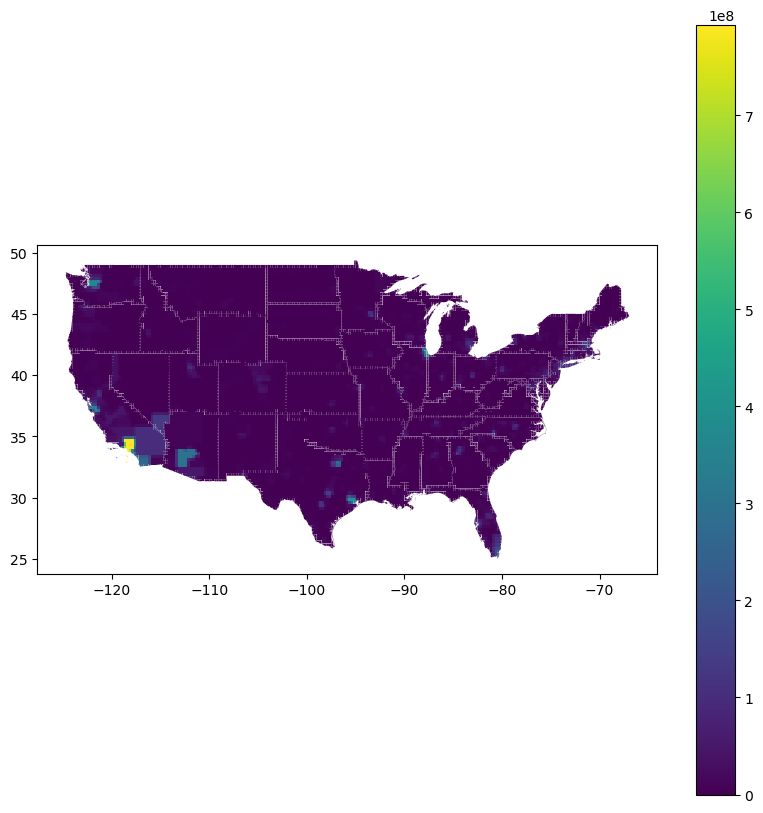

In [26]:
# Plot RGDP on a map
rgdp_geo = full_grid_panel[full_grid_panel["year"] == 2022][["grid_id", "rgdp"]].merge(
    grids[["grid_id", "geometry"]],
    on="grid_id"
)
rgdp_geo = gpd.GeoDataFrame(
    rgdp_geo,
    geometry=rgdp_geo["geometry"],
    crs="EPSG:4326"
)
rgdp_geo.plot(column="rgdp", cmap="viridis", legend=True, figsize=(10, 10), edgecolor=None)

In [27]:
# Check Cook County in 2022
county_controls[(county_controls["FIPS5"] == "17031") & (county_controls["year"] == 2022)]

,FIPS5,year,median_household_income,total_pop,white_pct,black_pct,asian_pct,other_pct,bachelors_pct,rgdp,personal_income,unemployment_rate,RUCC_2013,grid_id,area_weight
296600,17031,2022,1.515583e+03,1.011376e+05,9.559416e-03,4.405488e-03,1.491276e-03,3.898931e-03,5.566153e-03,8.152469e+06,7.288921e+06,9.677555e-02,1.935511e-02,17133,1.935511e-02
296601,17031,2022,8.484377e+03,5.661778e+05,5.351453e-02,2.466235e-02,8.348306e-03,2.182659e-02,3.115986e-02,4.563831e+07,4.080408e+07,5.417589e-01,1.083518e-01,17134,1.083518e-01
296602,17031,2022,1.553176e+03,1.036462e+05,9.796532e-03,4.514763e-03,1.528266e-03,3.995642e-03,5.704219e-03,8.354687e+06,7.469719e+06,9.917601e-02,1.983520e-02,17393,1.983520e-02
296603,17031,2022,4.792246e+04,3.197952e+06,3.022671e-01,1.393008e-01,4.715388e-02,1.232835e-01,1.760008e-01,2.577797e+08,2.304744e+08,3.060026e+00,6.120052e-01,17394,6.120052e-01
296604,17031,2022,5.073109e-10,3.385377e-08,3.199823e-15,1.474649e-15,4.991747e-16,1.305089e-15,1.863158e-15,2.728876e-06,2.439820e-06,3.239367e-14,6.478735e-15,17395,6.478735e-15
296605,17031,2022,7.196947e+04,4.802652e+06,4.539417e-01,2.092005e-01,7.081524e-02,1.851460e-01,2.643163e-01,3.871310e+08,3.461242e+08,4.595517e+00,9.191034e-01,17395,9.191034e-01
296606,17031,2022,2.197379e+02,1.466350e+04,1.385979e-03,6.387329e-04,2.162138e-04,5.652894e-04,8.070129e-04,1.181992e+06,1.056790e+06,1.403108e-02,2.806215e-03,17653,2.806215e-03
296607,17031,2022,3.322687e+03,2.217289e+05,2.095758e-02,9.658371e-03,3.269399e-03,8.547820e-03,1.220296e-02,1.787307e+07,1.597987e+07,2.121659e-01,4.243317e-02,17654,4.243317e-02
296608,17031,2022,5.367926e+04,3.582113e+06,3.385776e-01,1.560346e-01,5.281836e-02,1.380932e-01,1.971433e-01,2.887461e+08,2.581607e+08,3.427619e+00,6.855238e-01,17655,6.855238e-01
296609,17031,2022,7.830400e+04,5.225367e+06,4.938962e-01,2.276137e-01,7.704818e-02,2.014419e-01,2.875806e-01,4.212050e+08,3.765890e+08,5.000000e+00,1.000000e+00,17656,1.000000e+00


<Axes: >

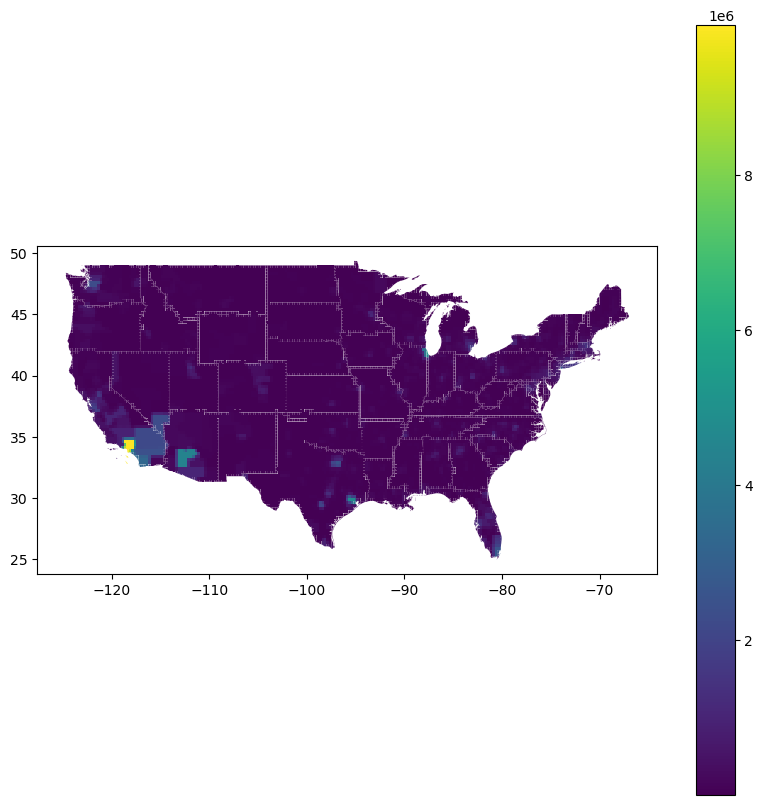

In [28]:
pop_geo = full_grid_panel[full_grid_panel["year"] == 2022][["grid_id", "total_pop"]].merge(
    grids[["grid_id", "geometry"]],
    on="grid_id"
)
pop_geo = gpd.GeoDataFrame(
    pop_geo,
    geometry=pop_geo["geometry"],
    crs="EPSG:4326"
)
pop_geo.plot(column="total_pop", cmap="viridis", legend=True, figsize=(10, 10), edgecolor=None)

<Axes: >

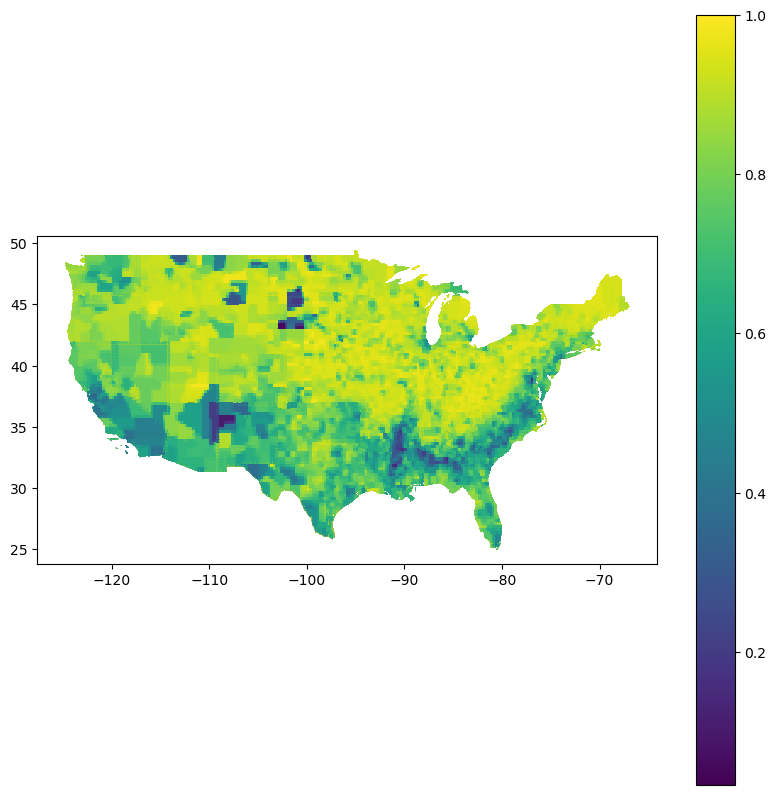

In [29]:
white_pct_geo = full_grid_panel[["grid_id", "white_pct"]].merge(
    grids[["grid_id", "geometry"]],
    on="grid_id"
)
white_pct_geo = gpd.GeoDataFrame(
    white_pct_geo,
    geometry=white_pct_geo["geometry"],
    crs="EPSG:4326"
)
white_pct_geo.plot(column="white_pct", cmap="viridis", legend=True, figsize=(10, 10))

<Axes: >

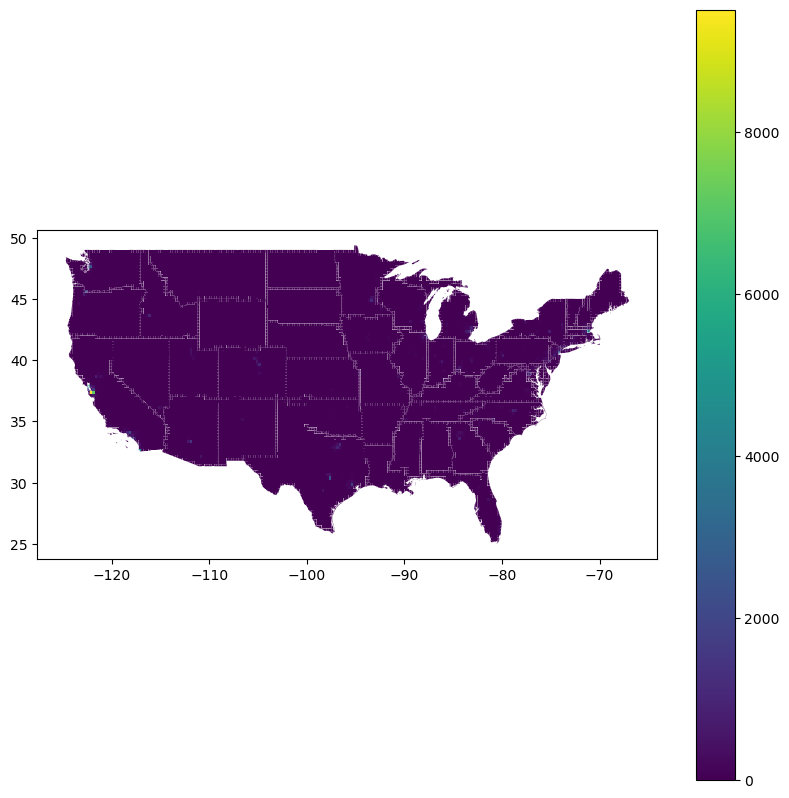

In [30]:
num_patents_geo = full_grid_panel[full_grid_panel["year"] == 2022][["grid_id", "num_patents"]].merge(
    grids[["grid_id", "geometry"]],
    on="grid_id"
)
num_patents_geo = gpd.GeoDataFrame(
    num_patents_geo,
    geometry=num_patents_geo["geometry"],
    crs="EPSG:4326"
)
num_patents_geo.plot(column="num_patents", cmap="viridis", legend=True, figsize=(10, 10), edgecolor=None)

<Axes: >

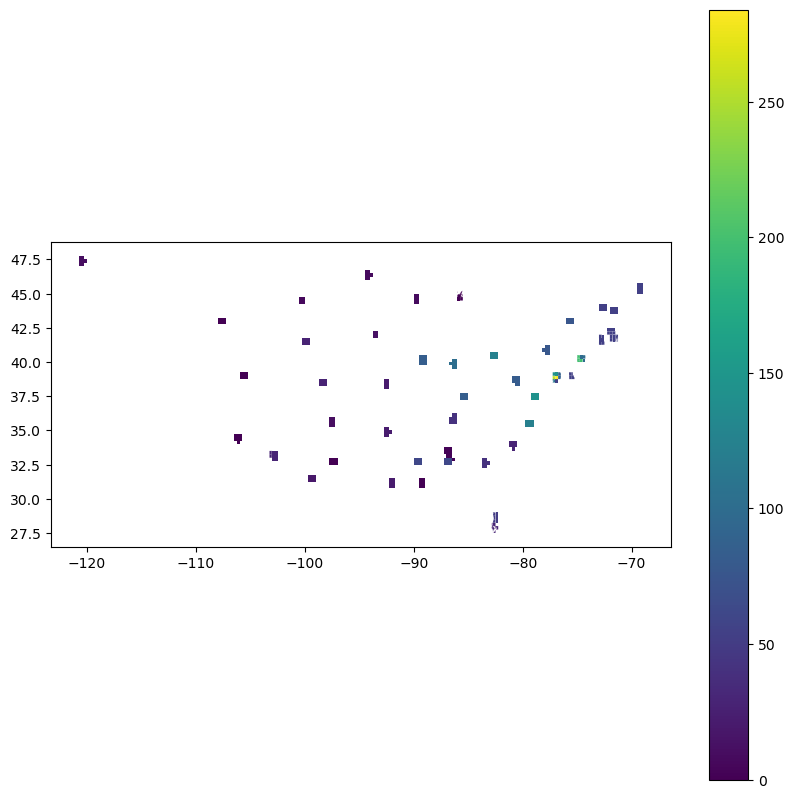

In [31]:
hurricane_sandy_geo = full_grid_panel[full_grid_panel["year"] == 2012][["grid_id", "hit", "count", "total_deaths", ]].merge(
    grids[["grid_id", "geometry"]],
    on="grid_id"
)
hurricane_sandy_geo = gpd.GeoDataFrame(
    hurricane_sandy_geo,
    geometry=hurricane_sandy_geo["geometry"],
    crs="EPSG:4326"
)
hurricane_sandy_geo.plot(column="total_deaths", cmap="viridis", legend=True, figsize=(10, 10), edgecolor=None)